In [27]:
import pandas as pd
import nltk
import ast
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sympy import sympify
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import MultiLabelBinarizer
from pycaret.classification import *
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('../data/train_data.csv')
data['tags'] = data['tags'].apply(ast.literal_eval)
mlb = MultiLabelBinarizer()
tags_binarized = mlb.fit_transform(data['tags'])
tags_df = pd.DataFrame(tags_binarized, columns=mlb.classes_)
data = pd.concat([data, tags_df], axis=1)
data.drop(columns='tags', inplace=True)

In [29]:
tag_cnt = [(tag, data[tag].sum()) for tag in tags_df]
tag_cnt = sorted(tag_cnt, key=lambda x : -x[1])

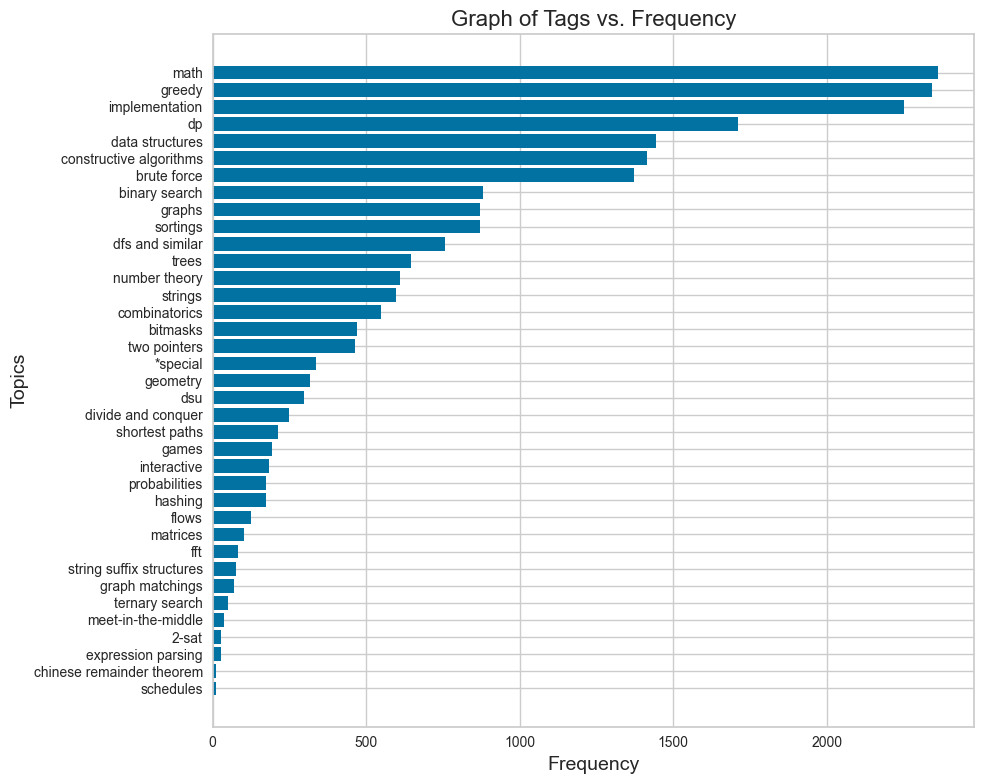

In [34]:
labels, values = zip(*tag_cnt)

plt.figure(figsize=(10, 8))
plt.barh(labels, values)
plt.title('Graph of Tags vs. Frequency', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Topics', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()